<a href="https://www.kaggle.com/code/rkmaurya93/calories-pred?scriptVersionId=238961629" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import pandas as pd
import numpy as np

# Uploading the dataset:

In [4]:
df=pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv",index_col=0)

In [5]:
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [6]:
df.shape

(750000, 8)

# Exploring the dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ MB


In [8]:
df.isnull().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Encoding the categorical_column:

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
df['Sex']=le.fit_transform(df['Sex'])

In [13]:
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,0,38,166.0,61.0,25.0,102.0,40.6,146.0


# plotting the Distribution:

### For Age columns:

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

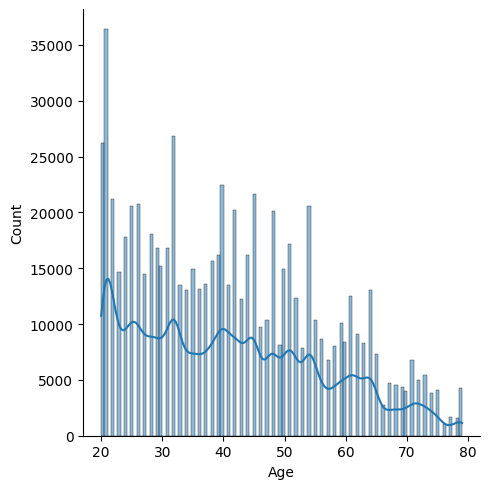

In [15]:
sns.displot(df['Age'],kde=True)
plt.show()

<Axes: ylabel='Age'>

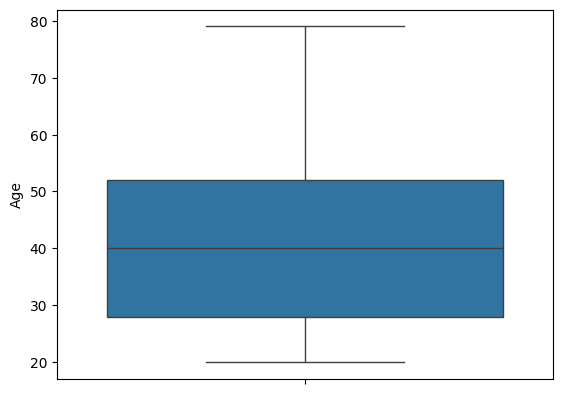

In [16]:
sns.boxplot(df['Age'])

### For height columns:

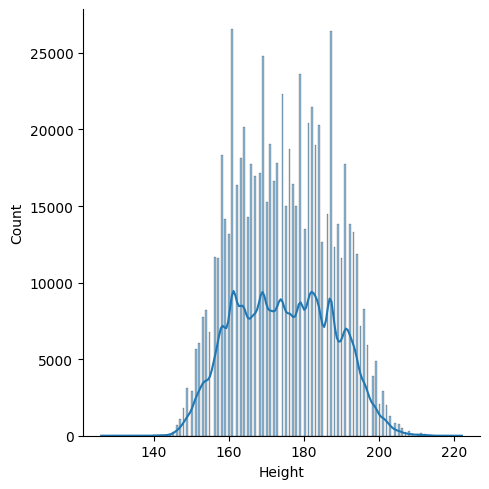

In [17]:
sns.displot(df['Height'],kde=True)

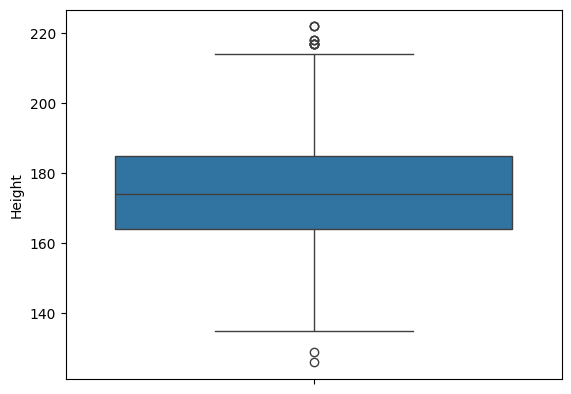

In [18]:
sns.boxplot(df['Height'])
plt.show()

In [19]:
df.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')

### for weight columns

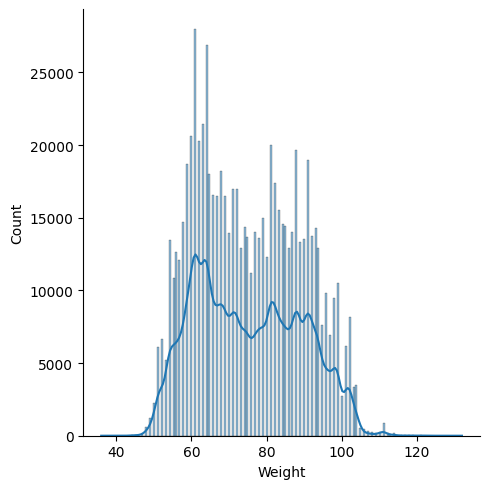

In [20]:
sns.displot(df['Weight'],kde=True)

<Axes: ylabel='Weight'>

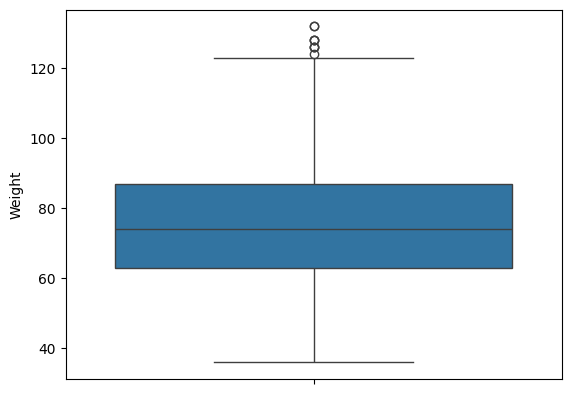

In [21]:
sns.boxplot(df['Weight'])

### Duration:	

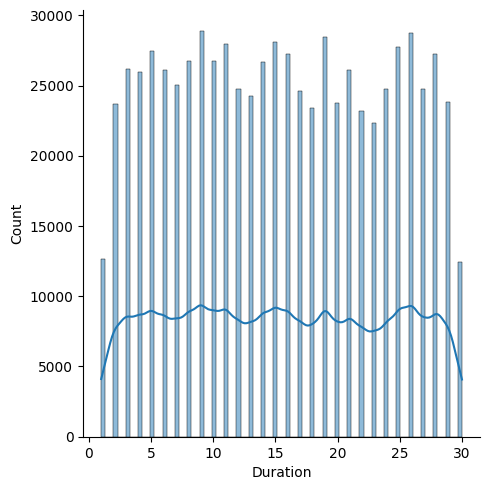

In [22]:
sns.displot(df['Duration'],kde=True)

<Axes: ylabel='Duration'>

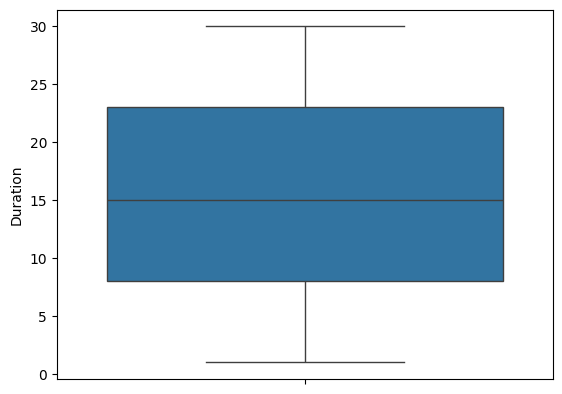

In [23]:
sns.boxplot(df['Duration'])

### Heart_Rate:

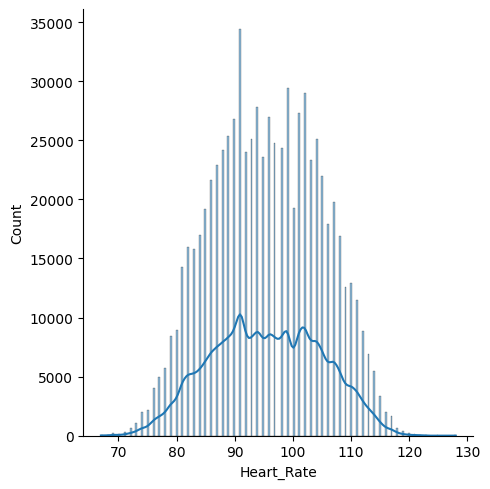

In [24]:
sns.displot(df['Heart_Rate'],kde=True)

<Axes: ylabel='Heart_Rate'>

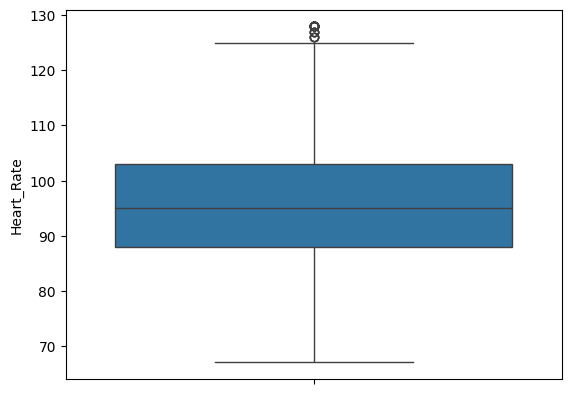

In [25]:
sns.boxplot(df['Heart_Rate'])

### Body_Temp

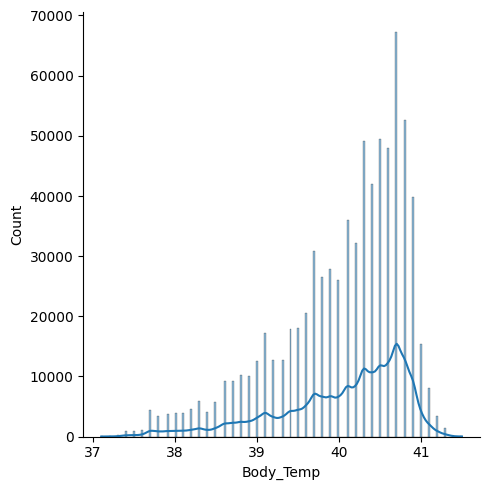

In [26]:
sns.displot(df['Body_Temp'],kde=True)

<Axes: ylabel='Body_Temp'>

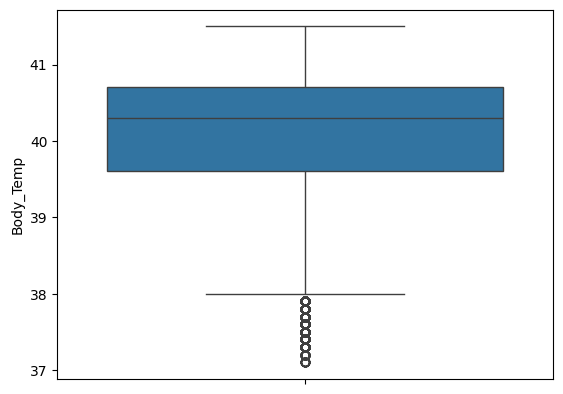

In [27]:
sns.boxplot(df['Body_Temp'])

# Handling the outliers:

In [28]:

# Function to detect and clip outliers using IQR
def clip_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Clipping the column values to the lower and upper bounds
    return column.clip(lower=lower_bound, upper=upper_bound)

# Apply the clipping function to numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = clip_outliers_iqr(df[col])

# Display the DataFrame after clipping
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,0,38,166.0,61.0,25.0,102.0,40.6,146.0


<Axes: ylabel='Calories'>

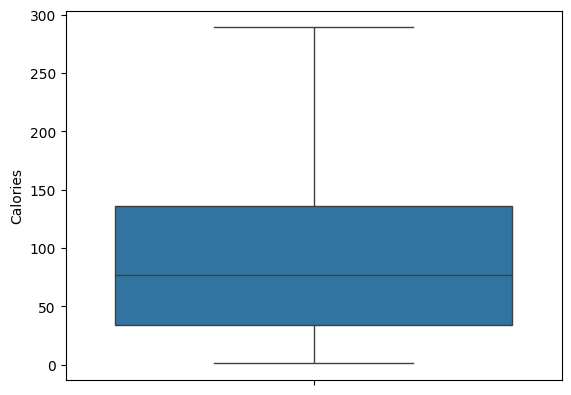

In [74]:
sns.boxplot(df['Calories'])

# correlation of feature with target_col:

In [29]:
df.corr()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Sex,1.000000,0.009689,0.755913,0.818259,-0.009594,0.009113,-0.015499,0.011981
Age,0.009689,1.000000,0.011976,0.073690,0.015656,0.017030,0.029482,0.145647
Height,0.755913,0.011976,1.000000,0.957972,-0.029938,-0.013245,-0.034198,-0.004067
Weight,0.818259,0.073690,0.957972,1.000000,-0.020848,-0.002398,-0.023281,0.015818
Duration,-0.009594,0.015656,-0.029938,-0.020848,1.000000,0.875341,0.908494,0.959958
Heart_Rate,0.009113,0.017030,-0.013245,-0.002398,0.875341,1.000000,0.800557,0.908762
Body_Temp,-0.015499,0.029482,-0.034198,-0.023281,0.908494,0.800557,1.000000,0.834946
Calories,0.011981,0.145647,-0.004067,0.015818,0.959958,0.908762,0.834946,1.000000


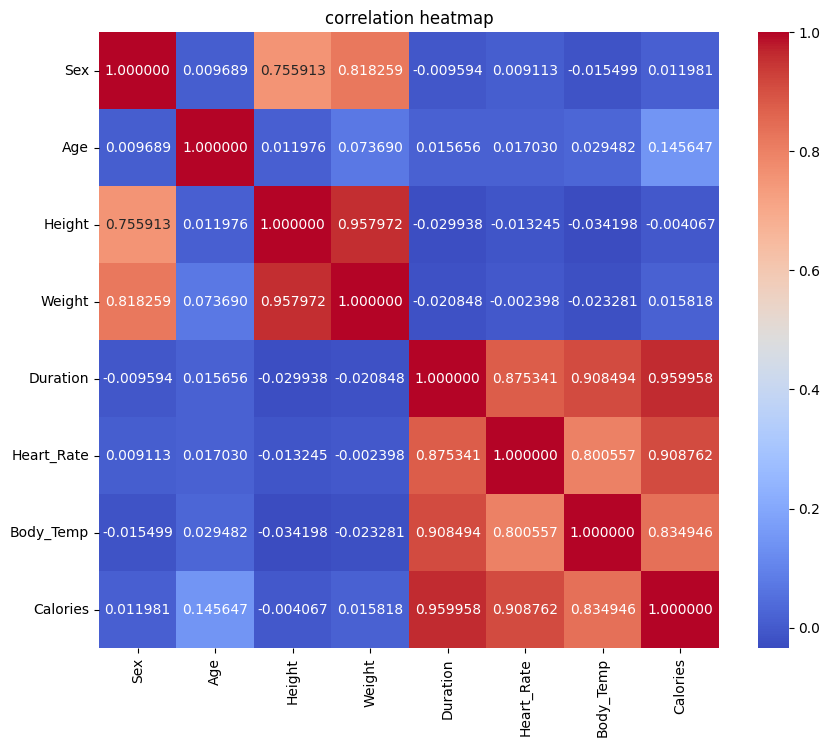

In [30]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='2f')
plt.title('correlation heatmap')
plt.show()

# Splitting the dataset in training and testing:

In [31]:
x=df.drop('Calories',axis=1)
y=df['Calories']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [134]:
x_train.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
id,,,,,,,
707701,0,22,177.0,63.0,6.0,84.0,39.1
657036,1,79,193.0,94.0,15.0,87.0,40.5
203978,0,50,158.0,62.0,15.0,85.0,40.0
222200,0,63,164.0,61.0,13.0,88.0,39.7
177069,0,59,170.0,74.0,25.0,106.0,40.7


# Scaling the training data:

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss=StandardScaler()

In [37]:
x_train_transform=ss.fit_transform(x_train)
x_test_transform=ss.transform(x_test)

In [75]:
print('missing vlaue in y_train',y_train.isnull().sum())

missing vlaue in y_train 0


In [76]:
print('missing values in y_test',y_test.isnull().sum())

missing values in y_test 0


In [56]:
x_train.isnull().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [65]:
print("Missing values in X_train:", x_train.isna().sum().sum())
print("Missing values in X_test:", x_test.isna().sum().sum())

Missing values in X_train: 0
Missing values in X_test: 0


In [77]:
print("NaNs in X_train after preprocessing:", np.isnan(x_train).sum().sum())
print("NaNs in X_test after preprocessing:", np.isnan(x_test).sum().sum())

print("Infs in X_train:", np.isinf(x_train).sum().sum())
print("Infs in X_test:", np.isinf(x_test).sum().sum())

NaNs in X_train after preprocessing: 0
NaNs in X_test after preprocessing: 0
Infs in X_train: 0
Infs in X_test: 0


In [58]:
x_test.isnull().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [38]:
x_train_transform

array([[-0.99902048, -1.28030061,  0.17848873, ..., -1.127434  ,
        -1.21541041, -1.22587878],
       [ 1.00098048,  2.47587282,  1.42638576, ..., -0.04995416,
        -0.89785187,  0.59920905],
       [-0.99902048,  0.56483721, -1.30338899, ..., -0.04995416,
        -1.10955757, -0.05260803],
       ...,
       [-0.99902048, -0.68722059, -2.1613182 , ...,  0.06976582,
        -0.26273479, -0.31333487],
       [-0.99902048, -1.08260727, -1.14740187, ...,  1.74584557,
         1.7484693 ,  1.38138954],
       [-0.99902048,  0.43304166, -1.0694083 , ...,  0.1894858 ,
        -0.68614618,  0.59920905]])

In [39]:
x_test_transform

array([[ 1.00098048,  0.43304166,  1.58237288, ..., -1.48659395,
        -2.37979173, -2.00805927],
       [ 1.00098048, -1.28030061,  1.27039863, ..., -1.36687396,
        -0.58029333, -1.74733244],
       [ 1.00098048,  0.63073499,  0.33447586, ...,  1.62612559,
         1.64261645,  1.25102613],
       ...,
       [-0.99902048, -1.34619839,  0.10049516, ...,  1.62612559,
         1.43091076,  1.12066271],
       [-0.99902048,  1.02612167, -1.22539543, ..., -1.00771402,
        -1.10955757, -0.83478853],
       [-0.99902048,  0.69663277, -1.14740187, ..., -0.52883409,
        -0.47444049, -0.18297145]])

# training the model using XGBoost:

In [43]:
from xgboost import XGBRegressor


In [78]:
xgb_model = XGBRegressor(
    n_estimators=300,     # Increase trees for better learning
    learning_rate=0.05,   # Reduce step size to prevent extreme predictions
    max_depth=10,          # Balance complexity
    min_child_weight=10,   # Avoid overfitting and unstable splits
    gamma=0.5,            # Add regularization
    subsample=0.8,        # Prevent reliance on certain features
    colsample_bytree=0.8, # Limit individual tree feature selection
    verbosity=2           # Enable debugging output
)

In [135]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [136]:
y_pred_xgb=xgb_model.predict(x_test)

In [137]:
print("Number of values close to zero:", np.sum(y_pred_xgb < 1e-6))

Number of values close to zero: 1


In [138]:
y_pred_xgb = np.where(y_pred_xgb < 1e-6, 1e-6, y_pred_xgb)  # Replace small values
y_pred_log = np.log(y_pred_xgb)  # Apply log safely

In [139]:
print("Min value in y_pred_xgb:", np.min(y_pred_xgb))
print("Number of negative or zero values:", np.sum(y_pred_xgb <= 0))

Min value in y_pred_xgb: 1e-06
Number of negative or zero values: 0


In [140]:
print("NaN in y_test_log:", np.isnan(y_test_log).sum())
print("NaN in y_pred_log:", np.isnan(y_pred_log).sum())

NaN in y_test_log: 0
NaN in y_pred_log: 0


In [141]:
from sklearn.metrics import r2_score,mean_squared_error

In [142]:
y_test_log=np.log(y_test)

In [143]:
print("Number of NaN values in predictions:", np.isnan(y_test_log).sum())

Number of NaN values in predictions: 0


In [144]:
rmsle=np.sqrt(mean_squared_error(y_test_log,y_pred_log))

In [145]:
rmsle

np.float64(0.08283618116507402)

# Checking the feature importance using xgboost:

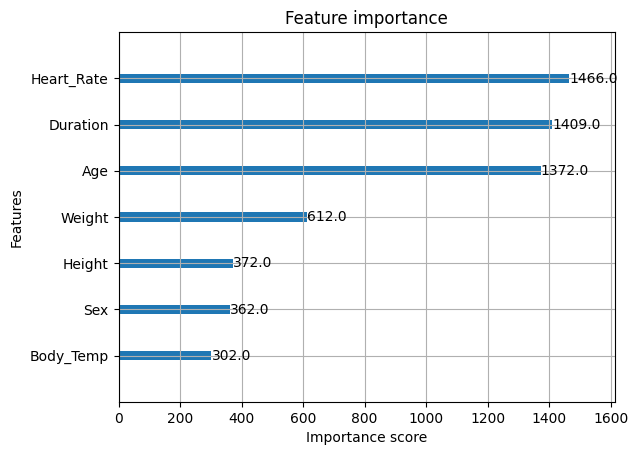

In [111]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)

# Plot feature importance
xgb.plot_importance(xgb_model)
plt.show()

# hyperparameter tunning:

In [147]:
import optuna 
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [154]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "n_estimators": trial.suggest_int("n_estimators", 100, 500)
    }

    model = XGBRegressor(**params)  # Ensure correct argument passing
    score = cross_val_score(model, x_train, y_train, scoring="neg_root_mean_squared_error", cv=5).mean()
    return -score  # Optuna minimizes, so we invert RMSE

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best Hyperparameters:", study.best_params_)

[I 2025-05-10 16:34:24,589] A new study created in memory with name: no-name-05769f34-3910-4404-9b40-59d43905b1cd
[I 2025-05-10 16:34:57,566] Trial 0 finished with value: 3.6003025934575916 and parameters: {'learning_rate': 0.0718789141121139, 'max_depth': 10, 'min_child_weight': 7, 'subsample': 0.7016680682585827, 'colsample_bytree': 0.7312586696970522, 'n_estimators': 375}. Best is trial 0 with value: 3.6003025934575916.
[I 2025-05-10 16:35:07,756] Trial 1 finished with value: 3.7731511436823064 and parameters: {'learning_rate': 0.043440533323159565, 'max_depth': 5, 'min_child_weight': 4, 'subsample': 0.9524484344123971, 'colsample_bytree': 0.9578827742589554, 'n_estimators': 277}. Best is trial 0 with value: 3.6003025934575916.
[I 2025-05-10 16:35:20,569] Trial 2 finished with value: 3.7093717958931913 and parameters: {'learning_rate': 0.030239297236531508, 'max_depth': 6, 'min_child_weight': 9, 'subsample': 0.9288988974218975, 'colsample_bytree': 0.832220478258014, 'n_estimators': 

AttributeError: 'Study' object has no attribute 'best_params_'

In [156]:
print("Best Hyperparameters:", study.best_trial.params)

Best Hyperparameters: {'learning_rate': 0.03190706204628612, 'max_depth': 9, 'min_child_weight': 7, 'subsample': 0.6751722758443965, 'colsample_bytree': 0.7839305757220908, 'n_estimators': 421}


In [157]:
best_params = study.best_trial.params
xgb_model = XGBRegressor(**best_params)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7839305757220908, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03190706204628612,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=421, n_jobs=None,
             num_parallel_tree=None, ...)

In [158]:
xgb_model_pred=xgb_model.predict(x_test)

In [160]:
y_pred_xgb = np.where(y_pred_xgb < 1e-6, 1e-6, xgb_model_pred)  # Replace small values
y_pred_log = np.log(xgb_model_pred)  # Apply log safely

In [161]:
y_test_log=np.log(y_test)

In [162]:
rmsle_xgb=np.sqrt(mean_squared_error(y_test_log,y_pred_log))

In [163]:
rmsle_xgb

np.float64(0.06945814968088386)

# Traing the model using Catboost:

# Training the model:

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf_model=RandomForestRegressor(n_estimators=200)

In [55]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

In [56]:
rf_model_prd=rf_model.predict(x_test)

# Evaluating the model Perfomence

In [57]:
from sklearn.metrics import r2_score,mean_squared_error

In [58]:
y_test_log=np.log(y_test)
y_pred_log=np.log(rf_model_prd)

In [59]:
rmsle=np.sqrt(mean_squared_error(y_test_log,y_pred_log))

In [60]:
rmsle

np.float64(0.07159916127809761)

# loading the test data:


In [164]:
df_test=pd.read_csv("/kaggle/input/playground-series-s5e5/test.csv",index_col=0)

In [165]:
df_test.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
id,,,,,,,
750000,male,45,177.0,81.0,7.0,87.0,39.8
750001,male,26,200.0,97.0,20.0,101.0,40.5
750002,female,29,188.0,85.0,16.0,102.0,40.4
750003,female,39,172.0,73.0,20.0,107.0,40.6
750004,female,30,173.0,67.0,16.0,94.0,40.5


# Encoding:

In [166]:
df_test['Sex']=le.transform(df_test['Sex'])

In [167]:
df_test.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
id,,,,,,,
750000,1,45,177.0,81.0,7.0,87.0,39.8
750001,1,26,200.0,97.0,20.0,101.0,40.5
750002,0,29,188.0,85.0,16.0,102.0,40.4
750003,0,39,172.0,73.0,20.0,107.0,40.6
750004,0,30,173.0,67.0,16.0,94.0,40.5


# Handling the Outliers:

In [168]:

# Function to detect and clip outliers using IQR
def clip_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Clipping the column values to the lower and upper bounds
    return column.clip(lower=lower_bound, upper=upper_bound)

# Apply the clipping function to numerical columns
for col in df_test.select_dtypes(include=['float64', 'int64']).columns:
    df_test[col] = clip_outliers_iqr(df_test[col])

# Display the DataFrame after clipping
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,,,,,,,,
0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,0,38,166.0,61.0,25.0,102.0,40.6,146.0


# Making the prediction:

In [171]:
test_pred=xgb_model.predict(df_test)

In [172]:
test_pred

array([ 27.362017, 107.470245,  87.726524, ...,  72.89527 , 168.58575 ,
        76.81299 ], dtype=float32)

In [173]:
submission_df=pd.DataFrame({'id':df_test.index,'Calories':test_pred})

In [174]:
submission_df.head()

,id,Calories
0,750000,27.362017
1,750001,107.470245
2,750002,87.726524
3,750003,126.131584
4,750004,76.309166


In [175]:
submission_df.to_csv('submission_rf.csv',index=False)